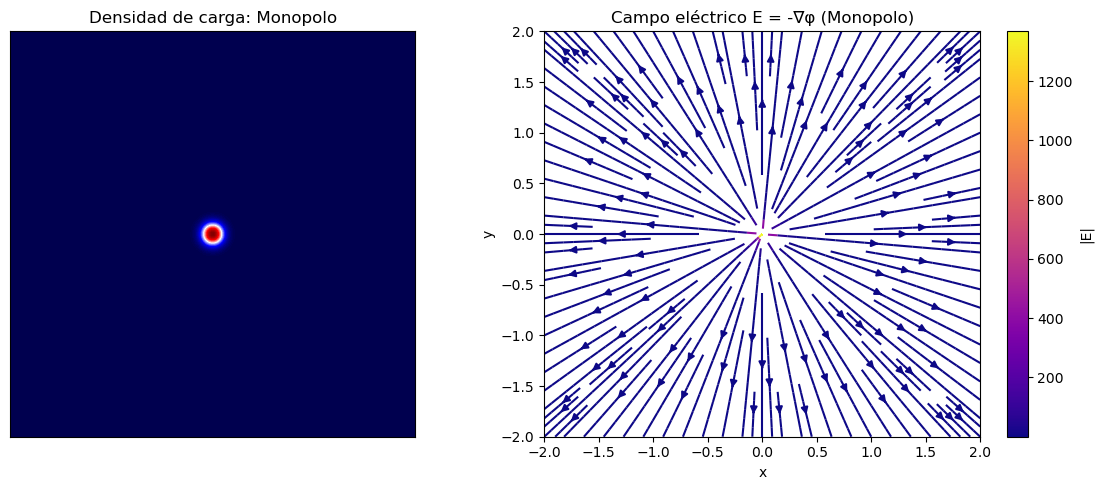

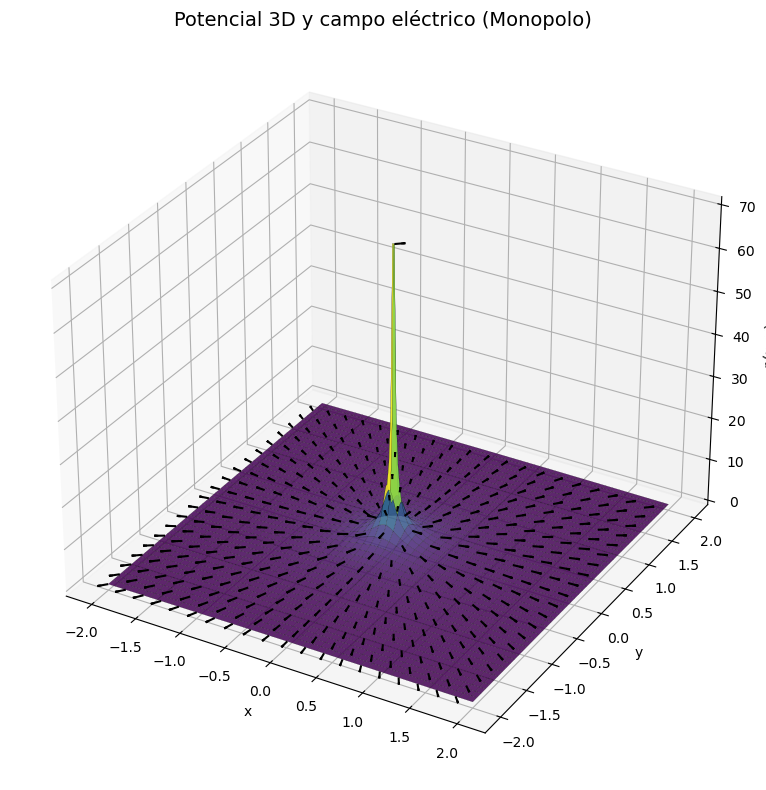

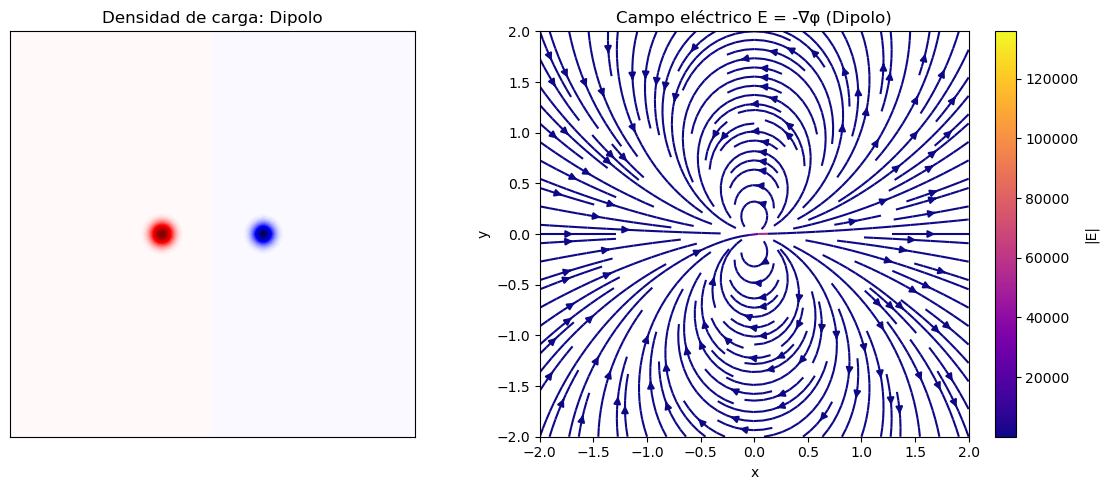

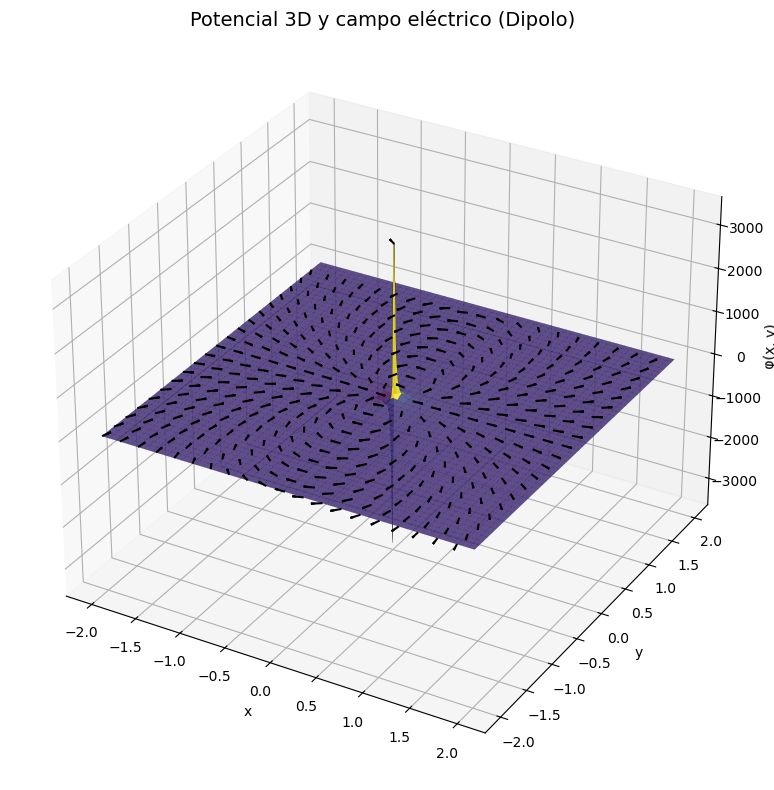

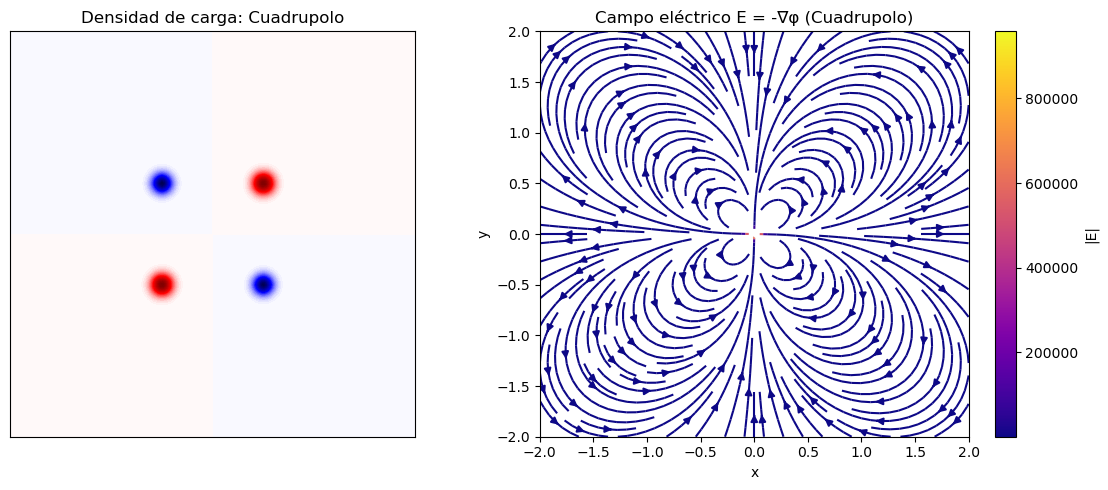

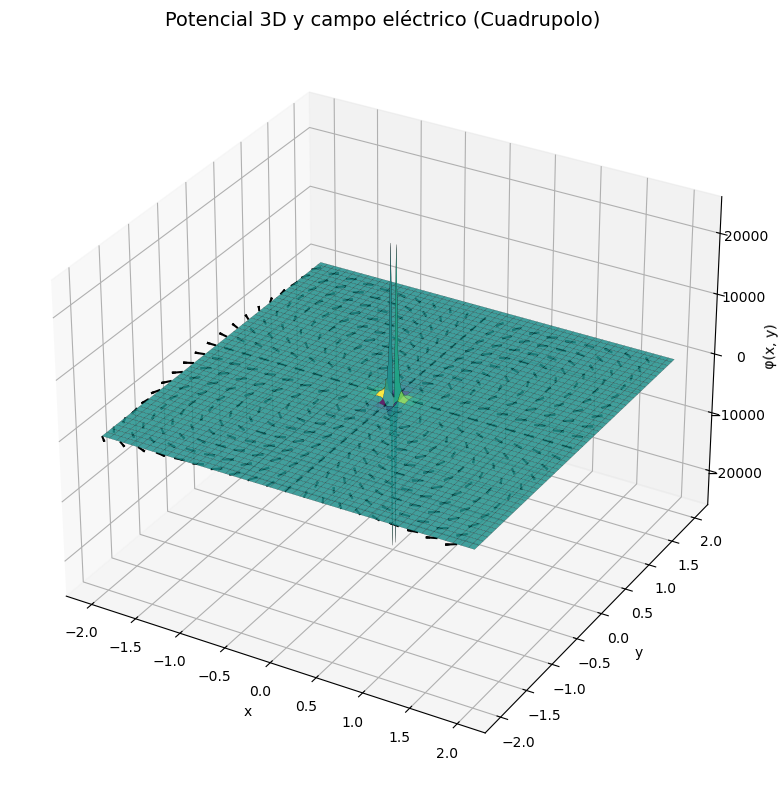

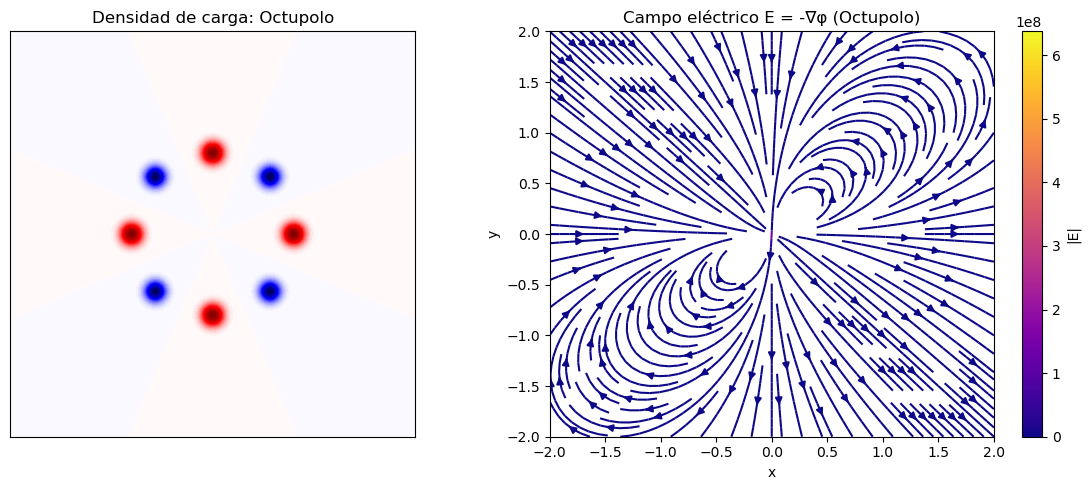

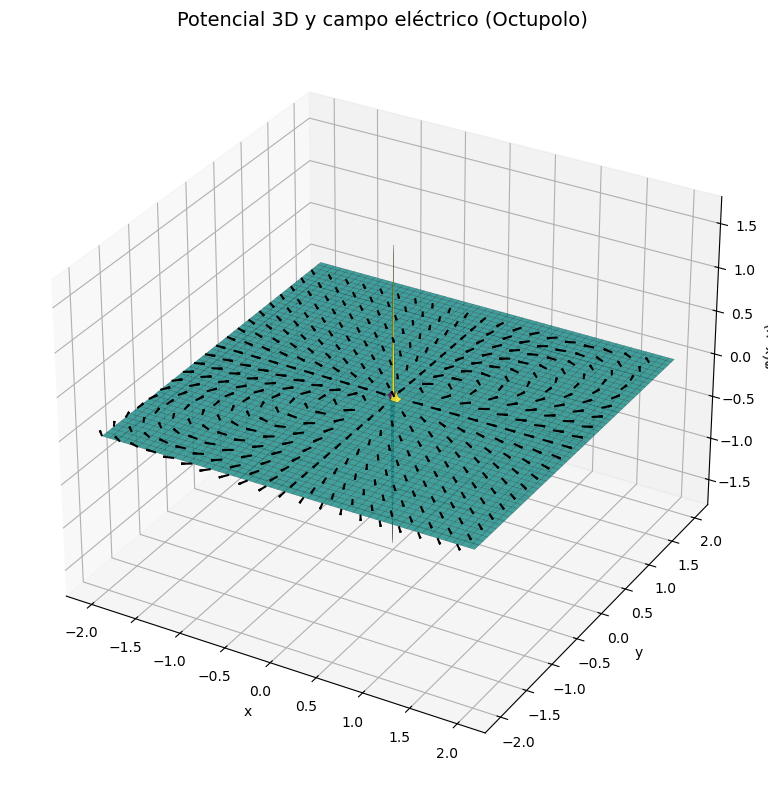

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z_grid = np.zeros_like(X)

p = np.array([1, 0, 0])
Q = np.array([[1, 0, 0],
              [0, -1, 0],
              [0, 0, 0]])
O = np.zeros((3, 3, 3))
O[0, 0, 0] = 1
O[1, 1, 1] = -1

def monopole_potential(X, Y):
    r = np.sqrt(X**2 + Y**2) + 1e-6
    return 1 / r

def dipole_potential(X, Y):
    r_vec = np.array([X, Y, Z_grid])
    r_mag = np.sqrt(X**2 + Y**2 + Z_grid**2) + 1e-6
    return (p[0]*X + p[1]*Y + p[2]*Z_grid) / r_mag**3

def quadrupole_potential(X, Y):
    r_vec = np.array([X, Y, Z_grid])
    r_mag = np.sqrt(X**2 + Y**2 + Z_grid**2) + 1e-6
    V = np.zeros_like(X)
    for i in range(3):
        for j in range(3):
            V += r_vec[i]*Q[i, j]*r_vec[j]
    return V / r_mag**5

def octupole_potential(X, Y):
    r_vec = np.array([X, Y, Z_grid])
    r_mag = np.sqrt(X**2 + Y**2 + Z_grid**2) + 1e-6
    V = np.zeros_like(X)
    for i in range(3):
        for j in range(3):
            for k in range(3):
                V += r_vec[i]*O[i, j, k]*r_vec[j]*r_vec[k]
    return V / r_mag**7

def monopole_density(X, Y):
    return np.exp(-100*((X)**2 + (Y)**2))

def dipole_density(X, Y):
    return np.exp(-100*((X + 0.5)**2 + Y**2)) - np.exp(-100*((X - 0.5)**2 + Y**2))

def quadrupole_density(X, Y):
    rho = np.zeros_like(X)
    rho += np.exp(-100*((X - 0.5)**2 + (Y - 0.5)**2))
    rho += np.exp(-100*((X + 0.5)**2 + (Y + 0.5)**2))
    rho -= np.exp(-100*((X - 0.5)**2 + (Y + 0.5)**2))
    rho -= np.exp(-100*((X + 0.5)**2 + (Y - 0.5)**2))
    return rho

def octupole_density(X, Y):
    rho = np.zeros_like(X)
    angles = np.linspace(0, 2*np.pi, 8, endpoint=False)
    for i, theta in enumerate(angles):
        x0, y0 = 0.8*np.cos(theta), 0.8*np.sin(theta)
        sign = 1 if i % 2 == 0 else -1
        rho += sign * np.exp(-100*((X - x0)**2 + (Y - y0)**2))
    return rho

potentials = [
    ("Monopolo", monopole_potential(X, Y), monopole_density(X, Y)),
    ("Dipolo", dipole_potential(X, Y), dipole_density(X, Y)),
    ("Cuadrupolo", quadrupole_potential(X, Y), quadrupole_density(X, Y)),
    ("Octupolo", octupole_potential(X, Y), octupole_density(X, Y))
]

for name, V, rho in potentials:
    Ey, Ex = np.gradient(-V, y, x)

    # --- Gráficas 2D: densidad y campo ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    ax0 = axes[0]
    charge = ax0.contourf(X, Y, rho, levels=100, cmap='seismic')
    ax0.set_title(f"Densidad de carga: {name}")
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_aspect('equal')

    ax1 = axes[1]
    magnitude = np.sqrt(Ex**2 + Ey**2)
    strm = ax1.streamplot(x, y, Ex, Ey, color=magnitude, cmap='plasma', density=1.5)
    ax1.set_title(f"Campo eléctrico E = -∇φ ({name})")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    plt.colorbar(strm.lines, ax=ax1, label='|E|')

    plt.tight_layout()
    plt.show()

    # --- Gráfica 3D: potencial y campo tangente ---
    fig3d = plt.figure(figsize=(10, 8))
    ax3d = fig3d.add_subplot(111, projection='3d')
    ax3d.plot_surface(X, Y, V, cmap=cm.viridis, edgecolor='k', linewidth=0.1, alpha=0.85)

    skip = (slice(None, None, 10), slice(None, None, 10))
    Ex_s = Ex[skip]
    Ey_s = Ey[skip]
    Ez_s = -np.sqrt(Ex_s**2 + Ey_s**2)
    norm = np.sqrt(Ex_s**2 + Ey_s**2 + Ez_s**2)
    Ex_n = np.divide(Ex_s, norm, out=np.zeros_like(Ex_s), where=norm != 0)
    Ey_n = np.divide(Ey_s, norm, out=np.zeros_like(Ey_s), where=norm != 0)
    Ez_n = np.divide(Ez_s, norm, out=np.zeros_like(Ez_s), where=norm != 0)

    ax3d.quiver(X[skip], Y[skip], V[skip], Ex_n, Ey_n, Ez_n, length=0.15, color='black')
    ax3d.set_title(f"Potencial 3D y campo eléctrico ({name})", fontsize=14)
    ax3d.set_xlabel("x")
    ax3d.set_ylabel("y")
    ax3d.set_zlabel("φ(x, y)")
    plt.tight_layout()
    plt.show()


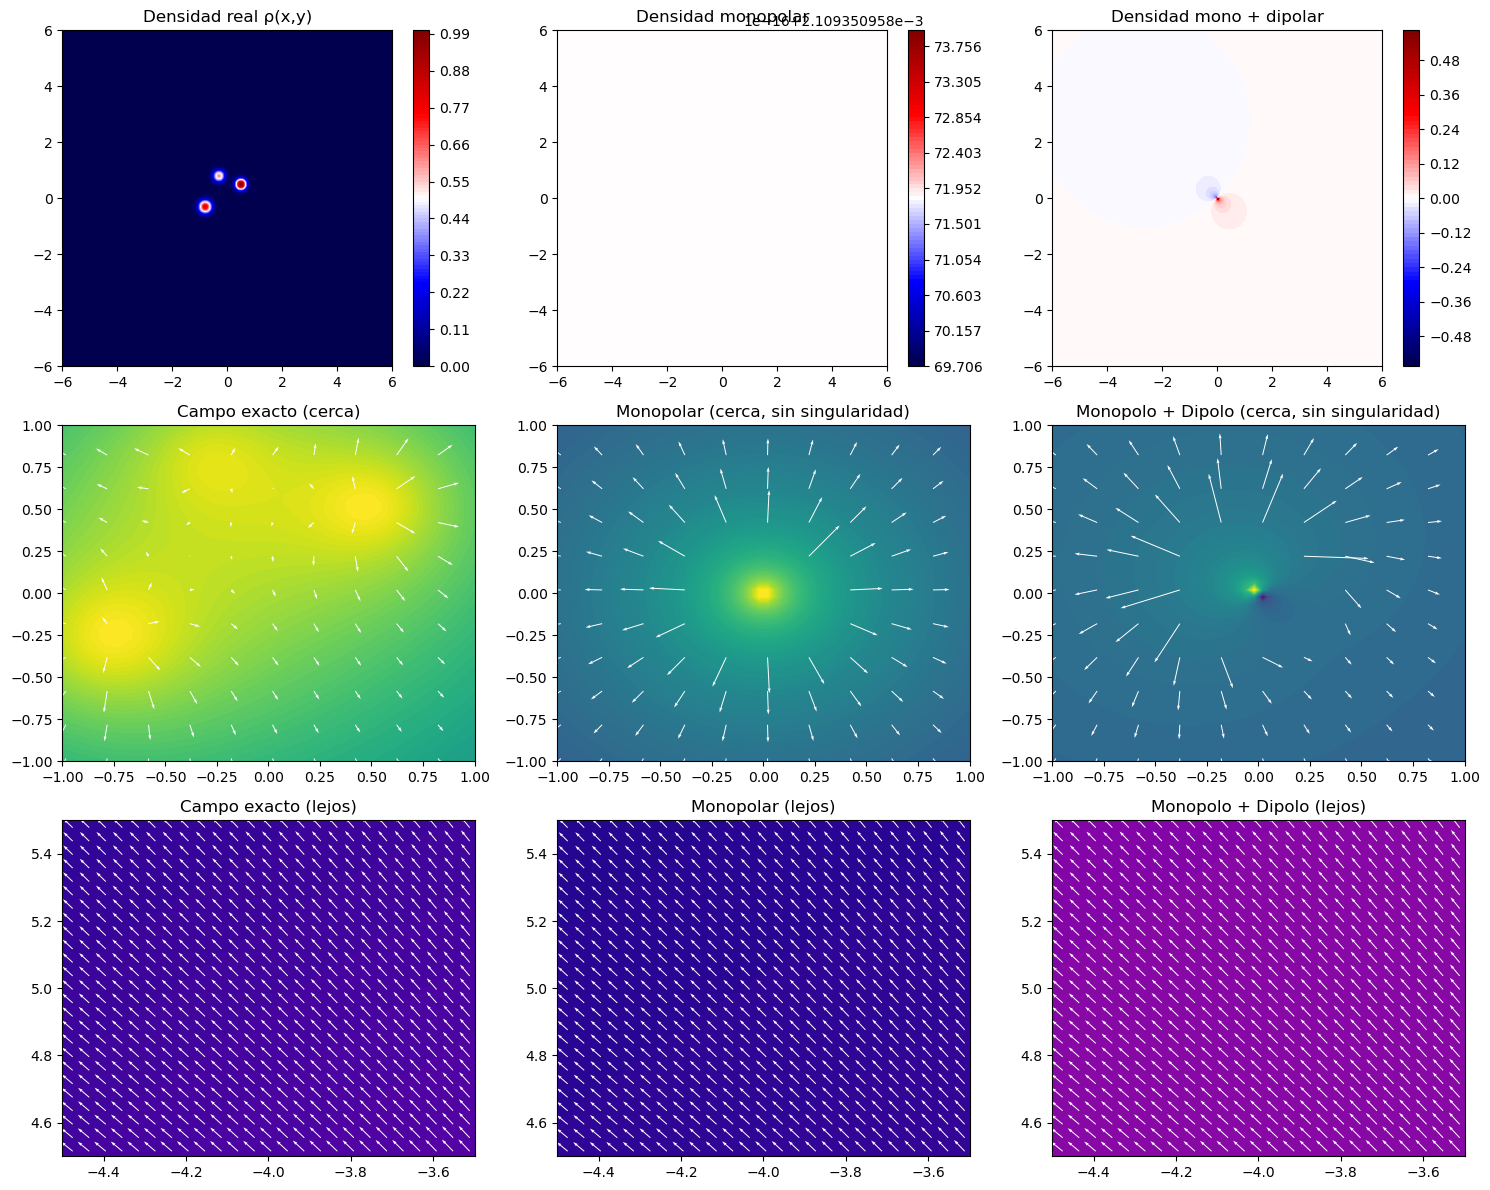

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

L = 12
N = 300
x = np.linspace(-L / 2, L / 2, N)
y = np.linspace(-L / 2, L / 2, N)
X, Y = np.meshgrid(x, y)

rho = (
    np.exp(-30 * ((X - 0.5)**2 + (Y - 0.5)**2)) +
    0.8 * np.exp(-20 * ((X + 0.8)**2 + (Y + 0.3)**2)) +
    0.6 * np.exp(-25 * ((X + 0.3)**2 + (Y - 0.8)**2))
)

dx = L / N
R = np.sqrt(X**2 + Y**2) + 1e-6
G = -1 / (2 * np.pi) * np.log(R)
phi = convolve2d(rho, G, mode='same', boundary='wrap') * dx**2
Ey, Ex = np.gradient(-phi, y, x)

Q = np.sum(rho) * dx**2
P = np.sum(rho * X) * dx**2, np.sum(rho * Y) * dx**2

phi_monopolo = -Q / (2 * np.pi) * np.log(np.sqrt(X**2 + Y**2) + 1e-6)
phi_dipolo = (P[0] * X + P[1] * Y) / (2 * np.pi * (X**2 + Y**2 + 1e-6))
phi_dip = phi_monopolo + phi_dipolo

Ey_mono, Ex_mono = np.gradient(-phi_monopolo, y, x)
Ey_dip, Ex_dip = np.gradient(-phi_dip, y, x)

mono_density = Q * np.ones_like(rho) / (L**2)
dip_density = -(P[0] * X + P[1] * Y) / (2 * np.pi * (X**2 + Y**2 + 1e-6))
dip_total = mono_density + dip_density

# Máscara ampliada para vecindad de singularidad
radio_corte = 0.3
R_mask = np.sqrt(X**2 + Y**2)
mask_cerca = R_mask < radio_corte

Ex_mono_masked = Ex_mono.copy()
Ey_mono_masked = Ey_mono.copy()
Ex_dip_masked = Ex_dip.copy()
Ey_dip_masked = Ey_dip.copy()

Ex_mono_masked[mask_cerca] = np.nan
Ey_mono_masked[mask_cerca] = np.nan
Ex_dip_masked[mask_cerca] = np.nan
Ey_dip_masked[mask_cerca] = np.nan

# Región lejana
x_range = (-4.5, -3.5)
y_range = (4.5, 5.5)
mask_x = (x >= x_range[0]) & (x <= x_range[1])
mask_y = (y >= y_range[0]) & (y <= y_range[1])
X_crop, Y_crop = np.meshgrid(x[mask_x], y[mask_y])

Ex_crop = lambda F: F[np.ix_(mask_y, mask_x)]
Ey_crop = lambda F: F[np.ix_(mask_y, mask_x)]

factor = 5
Ex_far = Ex_crop(Ex) * factor
Ey_far = Ey_crop(Ey) * factor
Ex_mono_far = Ex_crop(Ex_mono) * factor
Ey_mono_far = Ey_crop(Ey_mono) * factor
Ex_dip_far = Ex_crop(Ex_dip) * factor
Ey_dip_far = Ey_crop(Ey_dip) * factor

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

c0 = axes[0, 0].contourf(X, Y, rho, 100, cmap='seismic')
axes[0, 0].set_title("Densidad real ρ(x,y)")
plt.colorbar(c0, ax=axes[0, 0])

axes[1, 0].contourf(X, Y, phi, 100, cmap='viridis')
axes[1, 0].quiver(X[::5, ::5], Y[::5, ::5], Ex[::5, ::5], Ey[::5, ::5], color='white')
axes[1, 0].set_xlim(-1, 1)
axes[1, 0].set_ylim(-1, 1)
axes[1, 0].set_title("Campo exacto (cerca)")

axes[2, 0].contourf(X, Y, phi, 100, cmap='plasma')
axes[2, 0].quiver(X_crop, Y_crop, Ex_far, Ey_far,
                  color='white', scale=1, scale_units='xy', angles='xy')
axes[2, 0].set_xlim(x_range)
axes[2, 0].set_ylim(y_range)
axes[2, 0].set_title("Campo exacto (lejos)")

c1 = axes[0, 1].contourf(X, Y, mono_density, 100, cmap='seismic')
axes[0, 1].set_title("Densidad monopolar")
plt.colorbar(c1, ax=axes[0, 1])

axes[1, 1].contourf(X, Y, phi_monopolo, 100, cmap='viridis')
axes[1, 1].quiver(X[::5, ::5], Y[::5, ::5], Ex_mono_masked[::5, ::5], Ey_mono_masked[::5, ::5], color='white')
axes[1, 1].set_xlim(-1, 1)
axes[1, 1].set_ylim(-1, 1)
axes[1, 1].set_title("Monopolar (cerca, sin singularidad)")

axes[2, 1].contourf(X, Y, phi_monopolo, 100, cmap='plasma')
axes[2, 1].quiver(X_crop, Y_crop, Ex_mono_far, Ey_mono_far,
                  color='white', scale=1, scale_units='xy', angles='xy')
axes[2, 1].set_xlim(x_range)
axes[2, 1].set_ylim(y_range)
axes[2, 1].set_title("Monopolar (lejos)")

c2 = axes[0, 2].contourf(X, Y, dip_total, 100, cmap='seismic')
axes[0, 2].set_title("Densidad mono + dipolar")
plt.colorbar(c2, ax=axes[0, 2])

axes[1, 2].contourf(X, Y, phi_dip, 100, cmap='viridis')
axes[1, 2].quiver(X[::5, ::5], Y[::5, ::5], Ex_dip_masked[::5, ::5], Ey_dip_masked[::5, ::5], color='white')
axes[1, 2].set_xlim(-1, 1)
axes[1, 2].set_ylim(-1, 1)
axes[1, 2].set_title("Monopolo + Dipolo (cerca, sin singularidad)")

axes[2, 2].contourf(X, Y, phi_dip, 100, cmap='plasma')
axes[2, 2].quiver(X_crop, Y_crop, Ex_dip_far, Ey_dip_far,
                  color='white', scale=1, scale_units='xy', angles='xy')
axes[2, 2].set_xlim(x_range)
axes[2, 2].set_ylim(y_range)
axes[2, 2].set_title("Monopolo + Dipolo (lejos)")

plt.tight_layout()
plt.show()


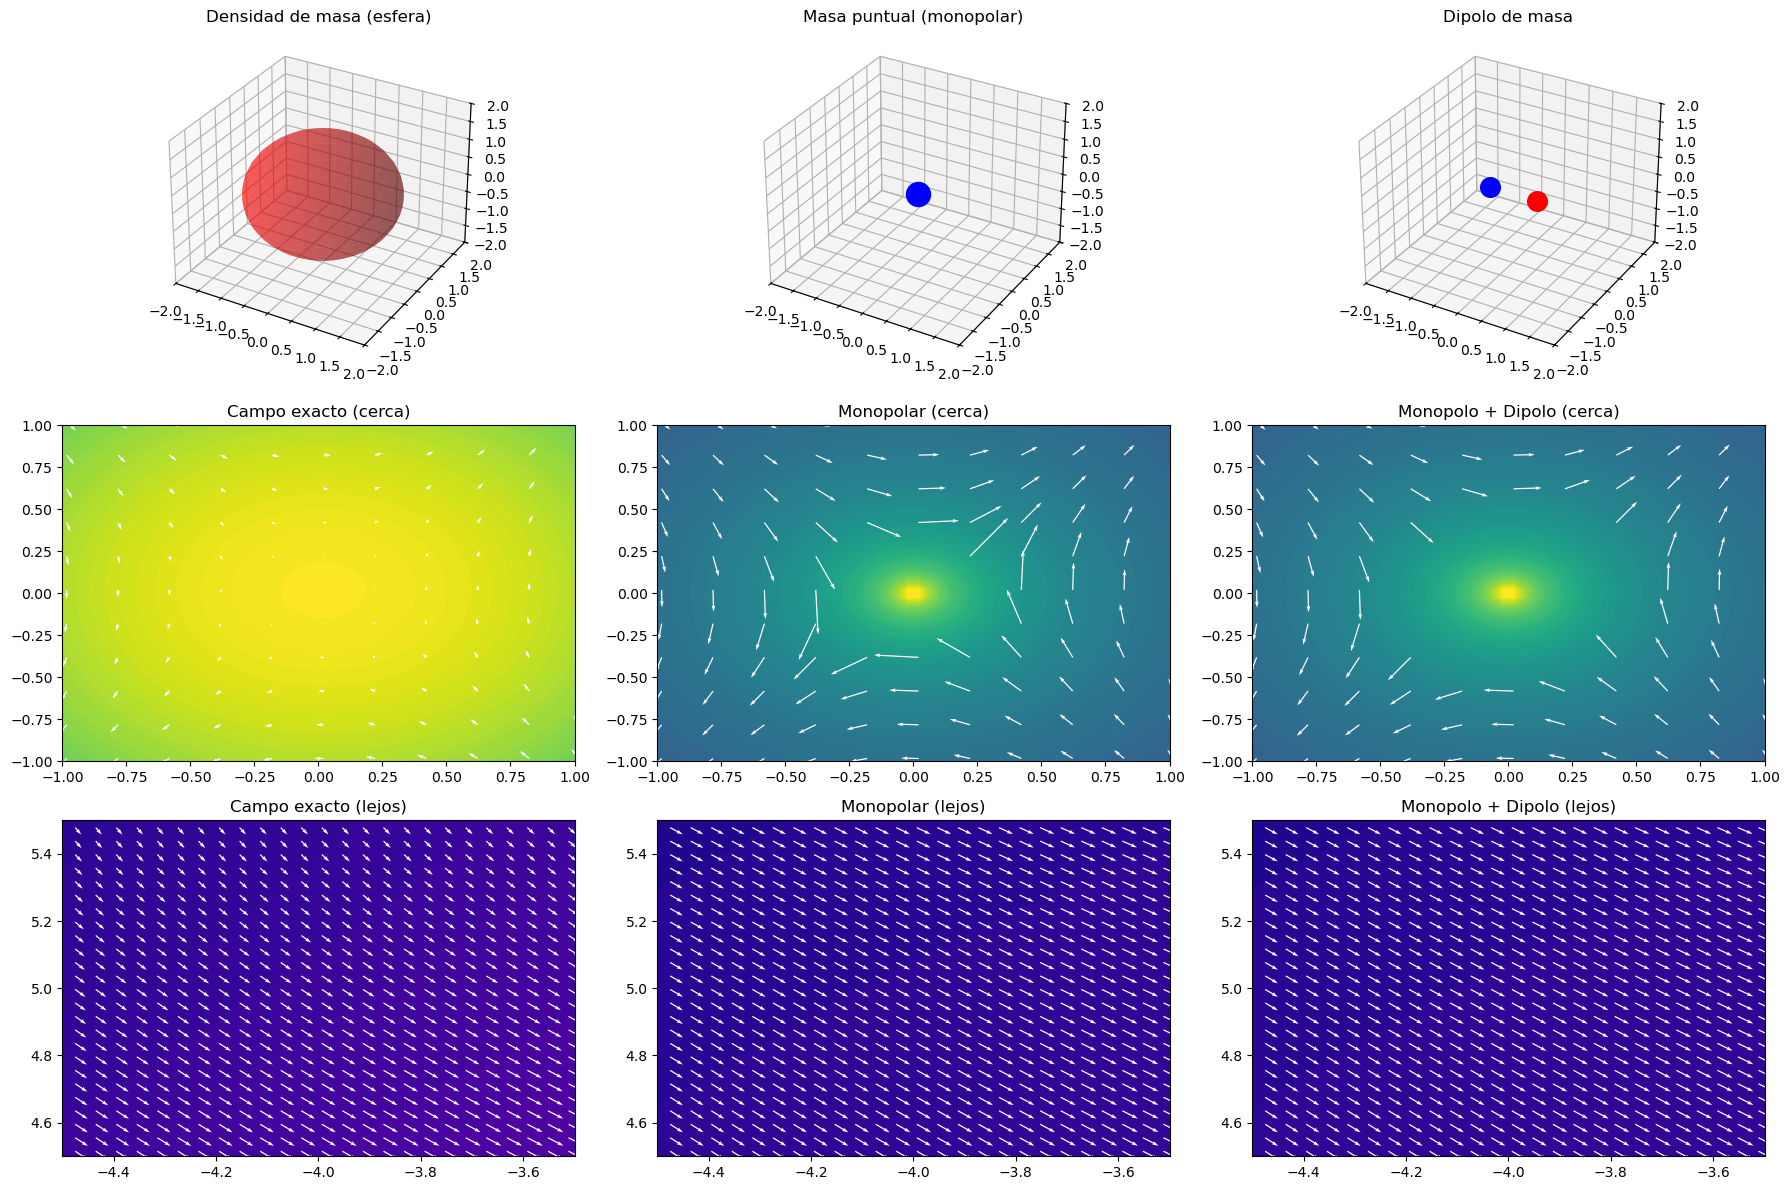

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import convolve2d

L = 12
N = 300
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
z = np.linspace(-L/2, L/2, N)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

R3D = np.sqrt(X**2 + Y**2 + Z**2)
rho_3d = np.zeros_like(R3D)
rho_3d[R3D <= 1.5] = 1.0

mid_z = N // 2
rho = rho_3d[:, :, mid_z]
X2D, Y2D = np.meshgrid(x, y, indexing='ij')
R2D = np.sqrt(X2D**2 + Y2D**2) + 1e-6

G = -1 / (2 * np.pi) * np.log(R2D)
dx = L / N
phi = convolve2d(rho, G, mode='same', boundary='wrap') * dx**2
Ey, Ex = np.gradient(-phi, y, x)

Q = np.sum(rho) * dx**2
P = (np.sum(rho * X2D) * dx**2, np.sum(rho * Y2D) * dx**2)

phi_mono = -Q / (2 * np.pi) * np.log(R2D)
phi_dip = (P[0] * X2D + P[1] * Y2D) / (2 * np.pi * R2D**2)
phi_dip_total = phi_mono + phi_dip

Ey_mono, Ex_mono = np.gradient(-phi_mono, y, x)
Ey_dip, Ex_dip = np.gradient(-phi_dip_total, y, x)

mono_density = Q * np.ones_like(rho) / (L**2)
dip_density = -(P[0] * X2D + P[1] * Y2D) / (2 * np.pi * (X2D**2 + Y2D**2 + 1e-6))
dip_total_density = mono_density + dip_density

r_mask = np.sqrt(X2D**2 + Y2D**2)
mask_mono = r_mask < 0.3
mask_dip = r_mask < 0.5

Ex_mono_masked = Ex_mono.copy()
Ey_mono_masked = Ey_mono.copy()
Ex_dip_masked = Ex_dip.copy()
Ey_dip_masked = Ey_dip.copy()

Ex_mono_masked[mask_mono] = np.nan
Ey_mono_masked[mask_mono] = np.nan
Ex_dip_masked[mask_dip] = np.nan
Ey_dip_masked[mask_dip] = np.nan

x_range = (-4.5, -3.5)
y_range = (4.5, 5.5)
mask_x = (x >= x_range[0]) & (x <= x_range[1])
mask_y = (y >= y_range[0]) & (y <= y_range[1])
X_crop, Y_crop = np.meshgrid(x[mask_x], y[mask_y], indexing='ij')

def crop_field(F):
    return F[np.ix_(mask_x, mask_y)]

factor = 0.2
Ex_far = crop_field(Ex) * factor
Ey_far = crop_field(Ey) * factor
Ex_mono_far = crop_field(Ex_mono) * factor
Ey_mono_far = crop_field(Ey_mono) * factor
Ex_dip_far = crop_field(Ex_dip) * factor
Ey_dip_far = crop_field(Ey_dip) * factor

fig = plt.figure(figsize=(18, 12))

# Fila 1: densidades ilustrativas
ax1 = fig.add_subplot(3, 3, 1, projection='3d')
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
xs = 1.5 * np.cos(u) * np.sin(v)
ys = 1.5 * np.sin(u) * np.sin(v)
zs = 1.5 * np.cos(v)
ax1.plot_surface(xs, ys, zs, color='red', alpha=0.4, linewidth=0)
ax1.set_title('Densidad de masa (esfera)')
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_zlim(-2, 2)

ax2 = fig.add_subplot(3, 3, 2, projection='3d')
ax2.scatter(0, 0, 0, color='blue', s=300)
ax2.set_title('Masa puntual (monopolar)')
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_zlim(-2, 2)

ax3 = fig.add_subplot(3, 3, 3, projection='3d')
ax3.scatter(-0.5, 0, 0, color='blue', s=200)
ax3.scatter(0.5, 0, 0, color='red', s=200)
ax3.set_title('Dipolo de masa')
ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_zlim(-2, 2)

# Fila 2: campo cerca
ax4 = fig.add_subplot(3, 3, 4)
ax4.contourf(X2D, Y2D, phi, 100, cmap='viridis')
ax4.quiver(X2D[::5, ::5], Y2D[::5, ::5], Ex[::5, ::5], Ey[::5, ::5], color='white')
ax4.set_xlim(-1, 1)
ax4.set_ylim(-1, 1)
ax4.set_title("Campo exacto (cerca)")

ax5 = fig.add_subplot(3, 3, 5)
ax5.contourf(X2D, Y2D, phi_mono, 100, cmap='viridis')
ax5.quiver(X2D[::5, ::5], Y2D[::5, ::5], Ex_mono_masked[::5, ::5], Ey_mono_masked[::5, ::5], color='white')
ax5.set_xlim(-1, 1)
ax5.set_ylim(-1, 1)
ax5.set_title("Monopolar (cerca)")

ax6 = fig.add_subplot(3, 3, 6)
ax6.contourf(X2D, Y2D, phi_dip_total, 100, cmap='viridis')
ax6.quiver(X2D[::5, ::5], Y2D[::5, ::5], Ex_dip_masked[::5, ::5], Ey_dip_masked[::5, ::5], color='white')
ax6.set_xlim(-1, 1)
ax6.set_ylim(-1, 1)
ax6.set_title("Monopolo + Dipolo (cerca)")

# Fila 3: campo lejos
ax7 = fig.add_subplot(3, 3, 7)
ax7.contourf(X2D, Y2D, phi, 100, cmap='plasma')
ax7.quiver(X_crop, Y_crop, Ex_far, Ey_far, color='white', scale=1, scale_units='xy', angles='xy')
ax7.set_xlim(x_range)
ax7.set_ylim(y_range)
ax7.set_title("Campo exacto (lejos)")

ax8 = fig.add_subplot(3, 3, 8)
ax8.contourf(X2D, Y2D, phi_mono, 100, cmap='plasma')
ax8.quiver(X_crop, Y_crop, Ex_mono_far, Ey_mono_far, color='white', scale=1, scale_units='xy', angles='xy')
ax8.set_xlim(x_range)
ax8.set_ylim(y_range)
ax8.set_title("Monopolar (lejos)")

ax9 = fig.add_subplot(3, 3, 9)
ax9.contourf(X2D, Y2D, phi_dip_total, 100, cmap='plasma')
ax9.quiver(X_crop, Y_crop, Ex_dip_far, Ey_dip_far, color='white', scale=1, scale_units='xy', angles='xy')
ax9.set_xlim(x_range)
ax9.set_ylim(y_range)
ax9.set_title("Monopolo + Dipolo (lejos)")

plt.tight_layout()
plt.show()
